In [1]:
# pandas dataframes to hold the text
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline
pd.options.display.max_columns = None


# Natural Language Processing
from nltk.tokenize import sent_tokenize

# Sentiment analysis - i trained a bag of words analysis for twitter
# this time i will use an off the shelf package
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# to read a directory on my PC
import glob

# to prepare the powerpoint presentation
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.enum.text import MSO_ANCHOR
from pptx.enum.dml import MSO_FILL
from pptx.dml.color import RGBColor

# # filter out all warnings - lets keep the warnings in for now, nice to read
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
# check on the panda version and its dependencies
# i run this from time to time to ensure all is up to date
pd.__version__
#pd.show_versions()

'0.25.3'

In [3]:
# Presentation preperation and image saving

# toggle to switch on image saving: 0 = off, 1 = on (i.e.save images and also slide titles)
savePNG = 0

# toggle to switch on powerpoint preparation: 0 = off, 1 = on (automatically saves the images also)
PwrptPrep = 1

# list of slide titles, text and images to add
monthNow = 'April 2020'
presentationTitle = ['ASOS Glassdoor sentiment analysis', 'Andrew Neville', monthNow]
saveFileName = 'presentationPrep - glassdoorSentiment.pptx'
slideTitle = []
slideText = []
imagePath = []

In [4]:
# in this code, there will only ever be one file to read:

files=[]

files = glob.glob("C:/Users/andrew/Documents/Big Data Project/Data Collectors/glassdoor/glassdoor/glassdoorASOS*.csv")
if len(files) == 0:
    files = []
    files = glob.glob("C:/Users/andre/Documents/Big Data Project/Data Collectors/glassdoor/glassdoor/glassdoorASOS*.csv")
if len(files) == 0:
    files = []
    files = glob.glob("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/glassdoor/glassdoor/glassdoorASOS*.csv")

# double check there is just the one file
print("files to read ", str(len(files)))
print("first file ",files[0])
print("last file ", files[-1])

files to read  1
first file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/glassdoor/glassdoor\glassdoorASOS.csv
last file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/glassdoor/glassdoor\glassdoorASOS.csv


In [5]:
# create the datefram to hold the file

df = pd.read_csv(files[0], encoding='utf-8')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 5 columns):
date                 580 non-null object
post_title           581 non-null object
employee_position    538 non-null object
post_text_pros       581 non-null object
post_text_cons       581 non-null object
dtypes: object(5)
memory usage: 22.8+ KB


In [7]:
df.head()

,date,post_title,employee_position,post_text_pros,post_text_cons
0,NaN,"""Great company""","Current Employee - Merchandiser,in,","Perks, fun office environment, facilities in o...",Nothing other than workload can get a bit heav...
1,28 August 2019,"""Great company and people""","Current Employee - Administrative,in,","I enjoyed my time here very much, the people a...",better perks would be nice!
2,25 April 2020,"""Amazing Time at job""","Former Employee - Software Engineer,in,",good people and good vibe,a lot of tasks need to be done
3,21 April 2020,"""A company that'll bounce back post COVID 19""","Current Employee - Trainee Train Driver,in,",Appeals to target consumers. Always looking in...,Customers can only contact via online. Each ti...
4,14 April 2020,"""great place to work but went downhill""",Former Employee - Customer Service Representat...,Good atmosphere \r\nGreat structure to progress,Very strict and controlling on work completed


In [8]:
analyzer = SentimentIntensityAnalyzer()

In [9]:
sentences_pros = list(df['post_text_pros'].values)
sentences_cons = list(df['post_text_cons'].values)

In [10]:
vs_pros = []

for text in sentences_pros:
    sentences = sent_tokenize(text)
    compound_score = 0
    
    for sentence in sentences:
        compound_score = compound_score + analyzer.polarity_scores(sentence)['neg']
    
    vs_pros.append(compound_score)
    
df['vs_pros'] = vs_pros # only focus on negatives

In [11]:
vs_cons = []

for text in sentences_cons:
    sentences = sent_tokenize(text)
    compound_score = 0
    
    for sentence in sentences:
        compound_score = compound_score + analyzer.polarity_scores(sentence)['neg']

    vs_cons.append(compound_score)        
        
df['vs_cons'] = vs_cons # only focus on negatives

In [12]:
df.head()

,date,post_title,employee_position,post_text_pros,post_text_cons,vs_pros,vs_cons
0,NaN,"""Great company""","Current Employee - Merchandiser,in,","Perks, fun office environment, facilities in o...",Nothing other than workload can get a bit heav...,0.0,0.0
1,28 August 2019,"""Great company and people""","Current Employee - Administrative,in,","I enjoyed my time here very much, the people a...",better perks would be nice!,0.0,0.0
2,25 April 2020,"""Amazing Time at job""","Former Employee - Software Engineer,in,",good people and good vibe,a lot of tasks need to be done,0.0,0.0
3,21 April 2020,"""A company that'll bounce back post COVID 19""","Current Employee - Trainee Train Driver,in,",Appeals to target consumers. Always looking in...,Customers can only contact via online. Each ti...,0.0,0.0
4,14 April 2020,"""great place to work but went downhill""",Former Employee - Customer Service Representat...,Good atmosphere \r\nGreat structure to progress,Very strict and controlling on work completed,0.0,0.0


In [13]:
# sort the dateframe into date order and eliminate any rows with no date

df = df[df['date'].notna()]

In [14]:
df.head()

,date,post_title,employee_position,post_text_pros,post_text_cons,vs_pros,vs_cons
1,28 August 2019,"""Great company and people""","Current Employee - Administrative,in,","I enjoyed my time here very much, the people a...",better perks would be nice!,0.0,0.000
2,25 April 2020,"""Amazing Time at job""","Former Employee - Software Engineer,in,",good people and good vibe,a lot of tasks need to be done,0.0,0.000
3,21 April 2020,"""A company that'll bounce back post COVID 19""","Current Employee - Trainee Train Driver,in,",Appeals to target consumers. Always looking in...,Customers can only contact via online. Each ti...,0.0,0.000
4,14 April 2020,"""great place to work but went downhill""",Former Employee - Customer Service Representat...,Good atmosphere \r\nGreat structure to progress,Very strict and controlling on work completed,0.0,0.000
5,11 April 2020,"""Enjoyed my time at ASOS""","Current Employee - Operations Manager,in,","Challenging, fast paced, rewarding, friendly, ...","Change in focus, lack of reporting,",0.0,0.315


In [15]:
df['date_datetime'] = pd.to_datetime(df['date'])

In [16]:
df.sort_values(by='date_datetime', inplace=True)

In [17]:
df = df.reset_index(drop=True)

In [18]:
df.tail()

,date,post_title,employee_position,post_text_pros,post_text_cons,vs_pros,vs_cons,date_datetime
575,19 April 2020,"""..""","Current Employee - Administrative,in,",Great people to work with,Management is lacking and lack of respect for ...,0.0,0.172,2020-04-19
576,21 April 2020,"""A company that'll bounce back post COVID 19""","Current Employee - Trainee Train Driver,in,",Appeals to target consumers. Always looking in...,Customers can only contact via online. Each ti...,0.0,0.000,2020-04-21
577,24 April 2020,"""Worst management""","Former Employee - Customer Care Advisor,in,",Good people to work with,"• High degree of favoritism within a team, exc...",0.0,0.000,2020-04-24
578,25 April 2020,"""Empty promises and poor management""","Former Employee - Customer Care Advisor,in,",Discount and job was easy,Promised progression and promotion that never ...,0.0,0.154,2020-04-25
579,25 April 2020,"""Amazing Time at job""","Former Employee - Software Engineer,in,",good people and good vibe,a lot of tasks need to be done,0.0,0.000,2020-04-25


In [19]:
first_day_post = df['date'][0]
last_day_post = df['date'][len(df)-1]

first_day_post, last_day_post

('10 January 2014', '25 April 2020')

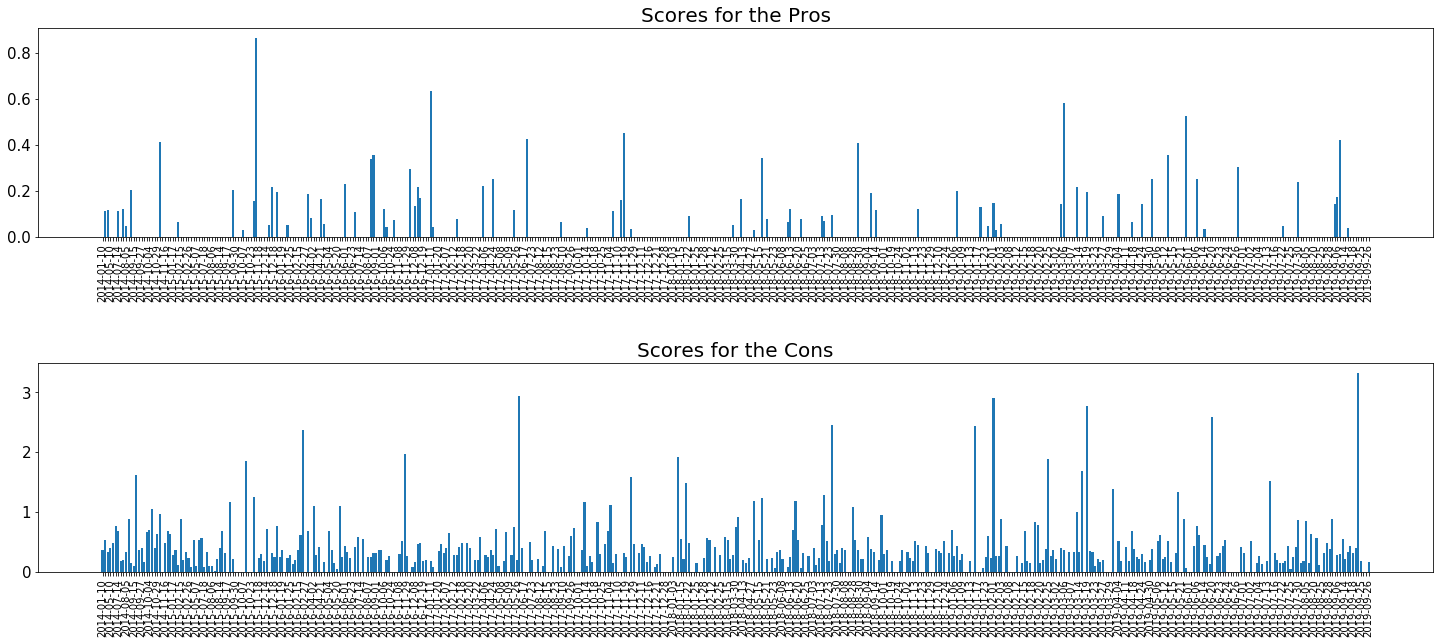

In [20]:
# plt 2 line charts showing pros and cons scores

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.6, wspace=0.1)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df['date_datetime'].astype(str)

labels = list(df['date_datetime'].astype(str))

label_space = 3
for i in range(label_space,len(labels),label_space):
    for ii in range(1,label_space):
        labels[i-ii]=''

labels[len(labels)-1]=list(df['date_datetime'].astype(str))[-1]
for ii in range(2,label_space):
    labels[len(labels)-ii]=''

y1 = df['vs_pros']
ax[0].set_title('Scores for the Pros', fontsize=20)
ax[0].set_xticklabels(labels, rotation = 90)
ax[0].yaxis.set_tick_params(labelsize=15)
ax[0].bar(x, y1)

y2 = df['vs_cons']
ax[1].set_title('Scores for the Cons', fontsize=20)
ax[1].set_xticklabels(labels, rotation = 90)
ax[1].yaxis.set_tick_params(labelsize=15)
ax[1].bar(x, y2)

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('glassdoor - pros and cons charts.png', bbox_inches = 'tight')
    
    slideTitle.append('Pros and Cons')
    slideText.append(str(first_day_post) + ' to '+ str(last_day_post))
    imagePath.append('glassdoor - pros and cons charts.png')
        
plt.show()


In [21]:
with pd.option_context('display.max_colwidth', 300):
    print(df['post_text_cons'][0:10])


0                                                                                                                                                                                                                                                  Hard to create change\r\nToo much management\r\nPoor salaries
1       No one really likes to help eachother.  Too many young kids thinking they are the bees knees.  The IT team really couldnt get themselves sorted.  Not really any processes in place and generally adverse to change considering it's had such growth.  \r\nNo real direction or support from management.
2               Politics and blame culture means that if you are not in with the right people then you won't have career progression or be rewarded for your hard work.  Management seems to favor people with a more aggressive hard nosed style rather than friendly and outgoing which is seen as a weakness.
3                                                                                    

In [22]:
# gather all the vs_cons and vs_pros into daily totals
# in case there was more than one post in a day
# and then put in a time line list

df_daily = df['vs_pros'].groupby(df['date_datetime']).sum().reset_index()

In [23]:
df_daily['vs_cons'] = list(df['vs_cons'].groupby(df['date_datetime']).sum())
df_daily['vs_total'] = df_daily['vs_pros'] + df_daily['vs_cons']

days_stamp = []
for i in range(len(df_daily)):
    days_stamp.append(pd.Timedelta(df_daily['date_datetime'][i].value).days)
df_daily['days_stamp'] = days_stamp


In [24]:
df_daily.tail(30)

,date_datetime,vs_pros,vs_cons,vs_total,days_stamp
457,2020-01-22,0.000,0.254,0.254,18283
458,2020-01-24,0.000,0.412,0.412,18285
459,2020-01-29,0.239,0.857,1.096,18290
460,2020-01-30,0.000,0.139,0.139,18291
461,2020-01-31,0.000,0.181,0.181,18292
462,2020-02-04,0.000,0.845,0.845,18296
463,2020-02-09,0.000,0.141,0.141,18301
464,2020-02-17,0.000,0.636,0.636,18309
465,2020-02-19,0.000,0.000,0.000,18311
466,2020-02-23,0.000,0.958,0.958,18315


In [25]:
# create a new dataframe to plot with all the days

all_days = []

start_day = df_daily['days_stamp'][0]
end_day = df_daily['days_stamp'][len(df_daily)-1]

for i in range(start_day,end_day+1):
    all_days.append(i)

df_chart = pd.DataFrame(all_days, columns=['all_days'])

In [26]:
# add in the 'vs_total' as the next column

vs_total_chart = []

for i in range(len(df_chart)):
    try:
        vs_total_chart.append(df_daily.loc[df_daily['days_stamp'] == df_chart['all_days'][i]]['vs_total'].values[0])
    except:
        vs_total_chart.append(0)
        
df_chart['vs_total_chart'] = vs_total_chart


In [27]:
# create a column with dates

df_chart['all_days_Date'] = pd.to_datetime(df_chart['all_days'],unit='d').dt.strftime('%Y-%m-%d')


In [28]:
df_chart.tail()

,all_days,vs_total_chart,all_days_Date
2293,18373,0.000,2020-04-21
2294,18374,0.000,2020-04-22
2295,18375,0.000,2020-04-23
2296,18376,0.000,2020-04-24
2297,18377,0.154,2020-04-25


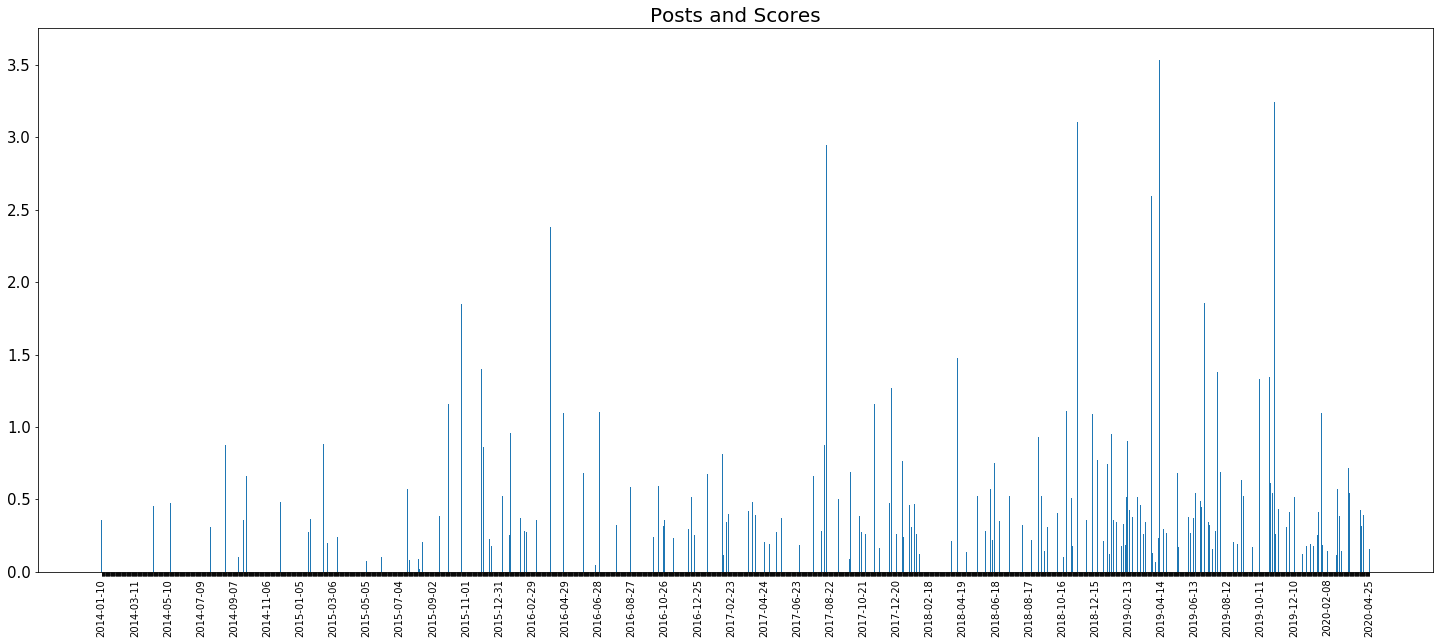

In [29]:
# plt 1 bar chart showing timeline activity

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.6, wspace=0.1)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_chart['all_days'].astype(str)

labels = list(df_chart['all_days_Date'].astype(str))

label_space = 60
for i in range(label_space,len(labels),label_space):
    for ii in range(1,label_space):
        labels[i-ii]=''

labels[len(labels)-1]=list(df_chart['all_days_Date'].astype(str))[-1]
for ii in range(2,label_space):
    labels[len(labels)-ii]=''

y1 = df_chart['vs_total_chart']
ax.set_title('Posts and Scores', fontsize=20)
ax.set_xticklabels(labels, rotation = 90)
ax.yaxis.set_tick_params(labelsize=15)
ax.bar(x, y1)


if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('glassdoor - datetime chart.png', bbox_inches = 'tight')
    
    slideTitle.append('Timeline of posts and negative scores')
    slideText.append(str(first_day_post) + ' to '+ str(last_day_post))
    imagePath.append('glassdoor - datetime chart.png')
        
plt.show()

In [30]:
# prepare to produce annual charts

start_year = df_chart['all_days_Date'][0][0:4]
end_year = df_chart['all_days_Date'][len(df_chart)-1][0:4]
all_years = int(end_year) - int(start_year) + 1

d1 = datetime.strptime(df_chart['all_days_Date'][0][0:5] + str('01-01'), "%Y-%m-%d")
d2 = datetime.strptime(df_chart['all_days_Date'][0], "%Y-%m-%d")
start_year_blank_days = (d2 - d1).days

d3 = datetime.strptime(df_chart['all_days_Date'][len(df_chart)-1], "%Y-%m-%d")
d4 = datetime.strptime(df_chart['all_days_Date'][len(df_chart)-1][0:5] + str('12-31'), "%Y-%m-%d")
end_year_blank_days = (d4 - d3).days



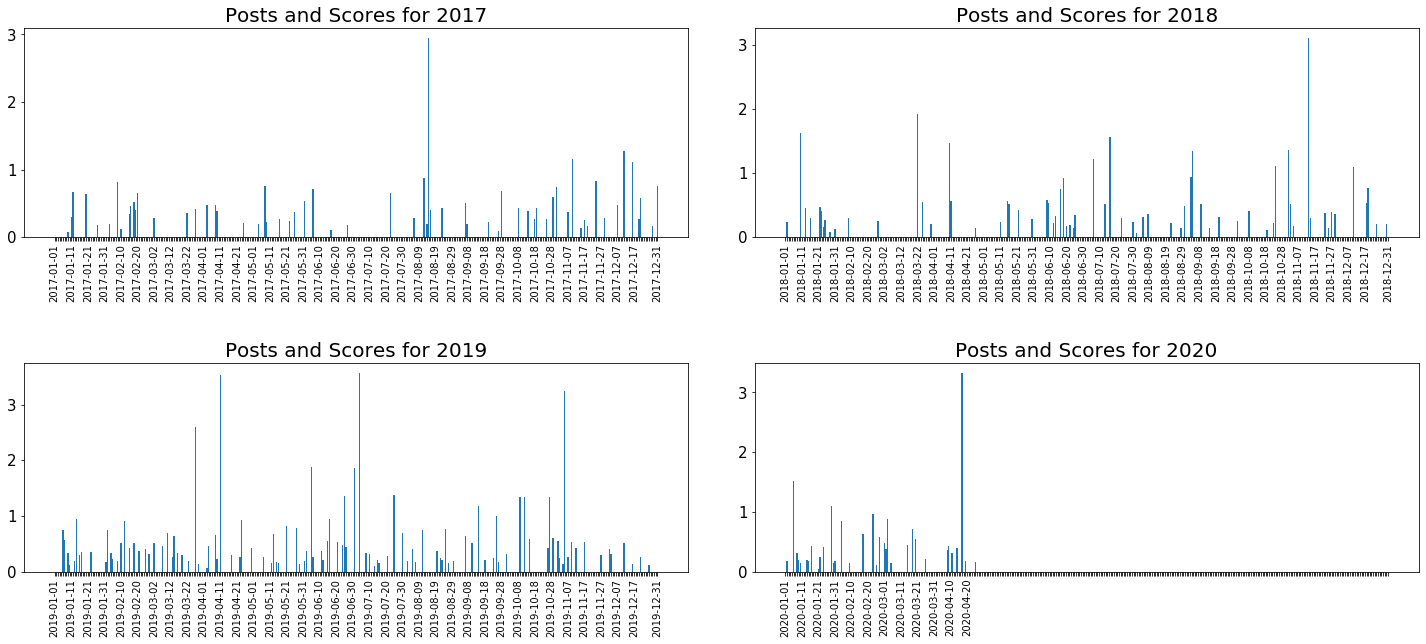

In [31]:
# plt 4 bar charts showing timeline activity of last 4 years

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.6, wspace=0.1)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

for year in range(int(end_year)-3,int(end_year)+1):

    x = []
    labels = []
    y1 = []

    # this wont work if there are less than 4 years of glassdoor reviews
    # will need to code for that
    # resolve for if year is the first year or the last year
    if str(year) == start_year:
        for i in range(start_year_blank_days*(-1),0):
                x.append(str(i))
                labels.append(' ')
                y1.append(0)
        first_day = df_chart['all_days_Date'][0]
        last_day = str(year) +  '-12-31'
    elif str(year) == end_year:
        first_day = str(year) + '-01-01'
        last_day = df_chart['all_days_Date'][len(df_chart)-1]
    else:
        first_day = str(year) + '-01-01'
        last_day = str(year) +  '-12-31'

    a = df_chart.loc[df_chart['all_days_Date']==first_day].index[0]
    b = df_chart.loc[df_chart['all_days_Date']==last_day].index[0]

    for i in range(a,b+1):
        x.append(df_chart['all_days_Date'][i])
        labels.append(df_chart['all_days_Date'][i])
        y1.append(df_chart['vs_total_chart'][i])

    # resolve for last year
    if str(year) == end_year:
        for i in range(0,end_year_blank_days):
                x.append(str(i))
                labels.append(' ')
                y1.append(0)

    # space the labels on the x-axis
    label_space = 10
    for i in range(label_space,len(labels),label_space):
        for ii in range(1,label_space):
            labels[i-ii]=''

    if str(year) != end_year:
        labels[len(labels)-1]=list(df_chart['all_days_Date'].astype(str))[b]
        for ii in range(2,label_space):
            labels[len(labels)-ii]=''
        
    a_loc = int((year-int(end_year)+3)/2)
    b_loc = ((year-int(end_year)+3)) % 2

    #y1 = df_chart['vs_total_chart']
    ax[a_loc,b_loc].set_title('Posts and Scores for ' + str(year), fontsize=20)
    ax[a_loc,b_loc].set_xticklabels(labels, rotation = 90)
    ax[a_loc,b_loc].yaxis.set_tick_params(labelsize=15)
    ax[a_loc,b_loc].bar(x, y1)


if savePNG == 1 or PwrptPrep == 1:
    save_file_name = 'glassdoor - 4 datetime charts ' + str(year) + '.png'
    plt.savefig(save_file_name, bbox_inches = 'tight')

    slideTitle.append('Timeline of posts and negative scores for last 4 years')
    slideText.append('')
    imagePath.append(save_file_name)

plt.show()

In [32]:
# plt 1 bar chart showing timeline activity

def annual_chart(year):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

    plt.subplots_adjust(hspace=0.6, wspace=0.1)
    #plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)


    x = []
    labels = []
    y1 = []
    
    # resolve for if year is the first year or the last year
    if str(year) == start_year:
        for i in range(start_year_blank_days*(-1),0):
                x.append(str(i))
                labels.append(' ')
                y1.append(0)
        first_day = df_chart['all_days_Date'][0]
        last_day = str(year) +  '-12-31'
    elif str(year) == end_year:
        first_day = str(year) + '-01-01'
        last_day = df_chart['all_days_Date'][len(df_chart)-1]
    else:
        first_day = str(year) + '-01-01'
        last_day = str(year) +  '-12-31'

    a = df_chart.loc[df_chart['all_days_Date']==first_day].index[0]
    b = df_chart.loc[df_chart['all_days_Date']==last_day].index[0]
                               
    for i in range(a,b+1):
        x.append(df_chart['all_days_Date'][i])
        labels.append(df_chart['all_days_Date'][i])
        y1.append(df_chart['vs_total_chart'][i])

    # resolve for last year
    if str(year) == end_year:
        for i in range(0,end_year_blank_days):
                x.append(str(i))
                labels.append(' ')
                y1.append(0)
    
    # space the labels on the x-axis
    label_space = 5
    for i in range(label_space,len(labels),label_space):
        for ii in range(1,label_space):
            labels[i-ii]=''

    if str(year) != end_year:
        labels[len(labels)-1]=list(df_chart['all_days_Date'].astype(str))[b]
        for ii in range(2,label_space):
            labels[len(labels)-ii]=''

    #y1 = df_chart['vs_total_chart']
    ax.set_title('Posts and Scores for ' + str(year), fontsize=20)
    ax.set_xticklabels(labels, rotation = 90)
    ax.yaxis.set_tick_params(labelsize=15)
    ax.bar(x, y1)


    if savePNG == 1 or PwrptPrep == 1:
        save_file_name = 'glassdoor - datetime chart ' + str(year) + '.png'
        plt.savefig(save_file_name, bbox_inches = 'tight')

        slideTitle.append('Timeline of posts and negative scores for ' + str(year))
        slideText.append('')
        imagePath.append(save_file_name)

    plt.show()

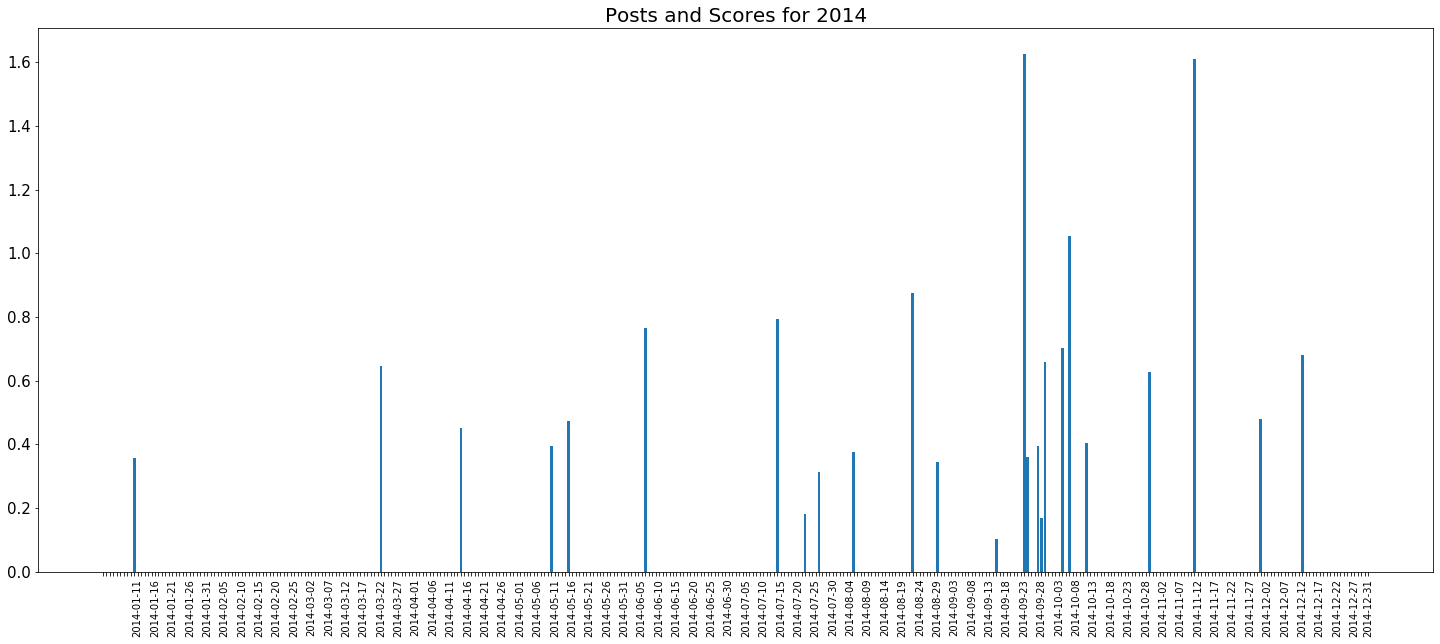

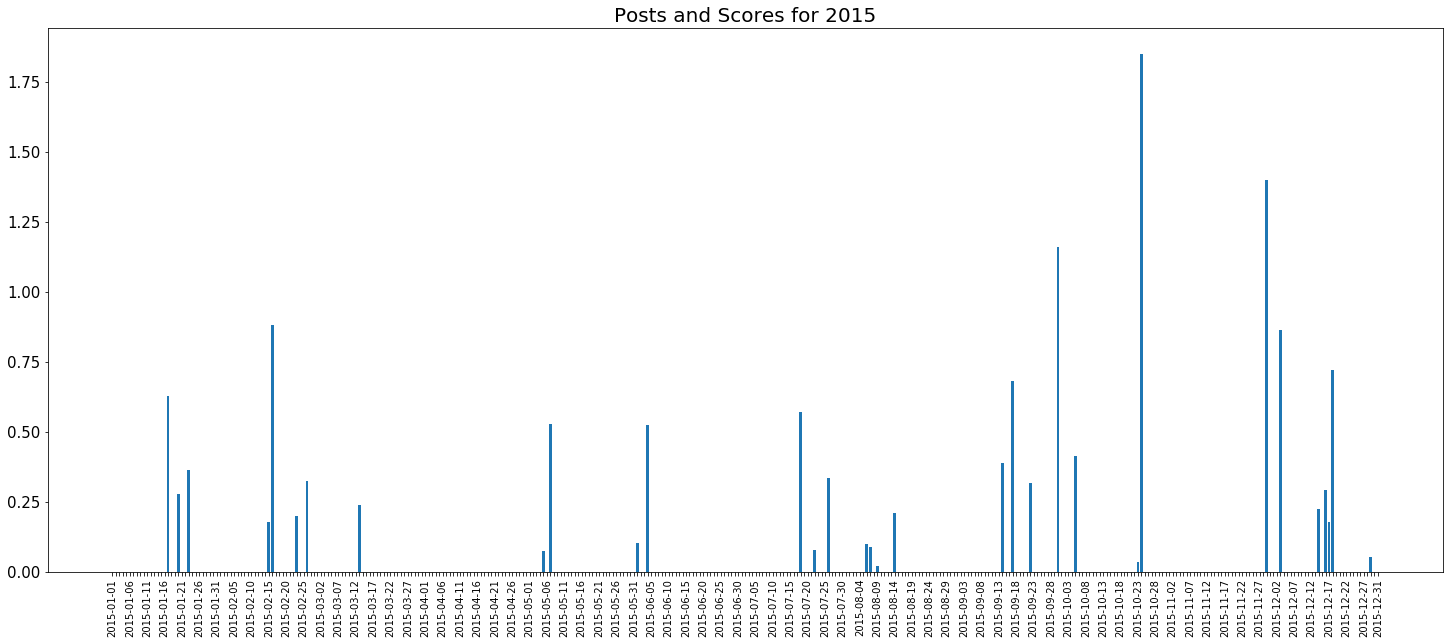

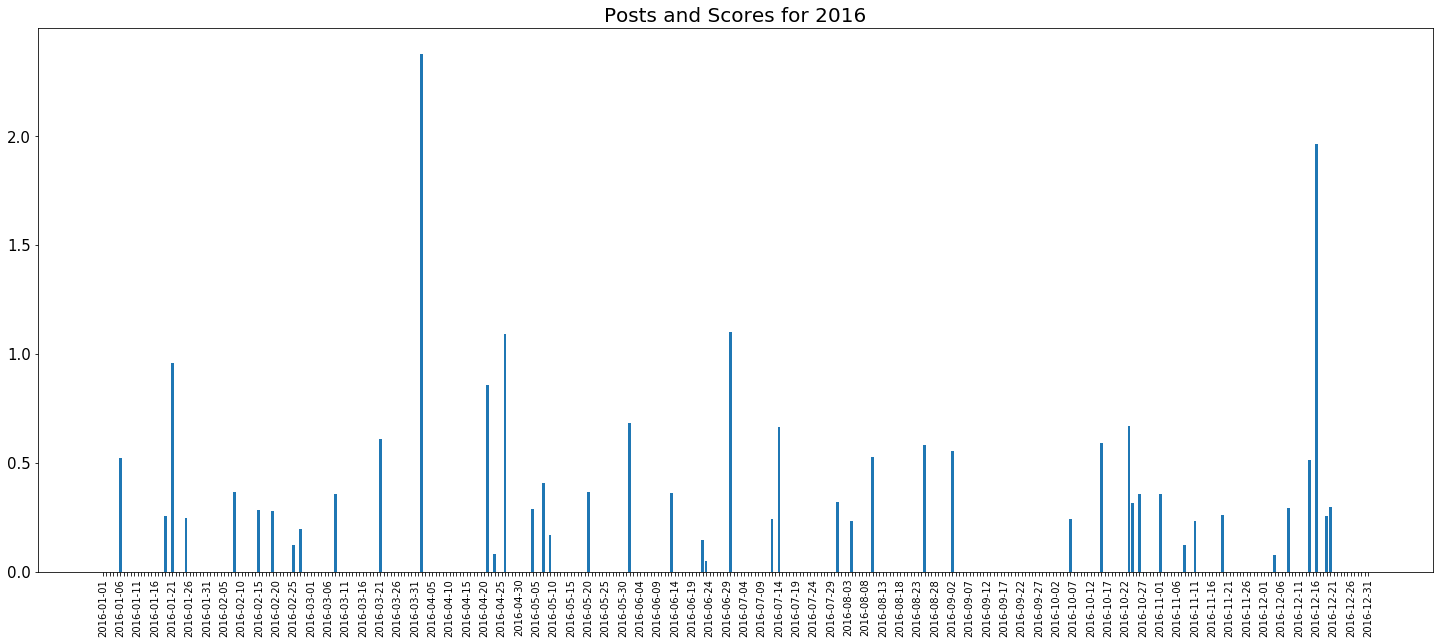

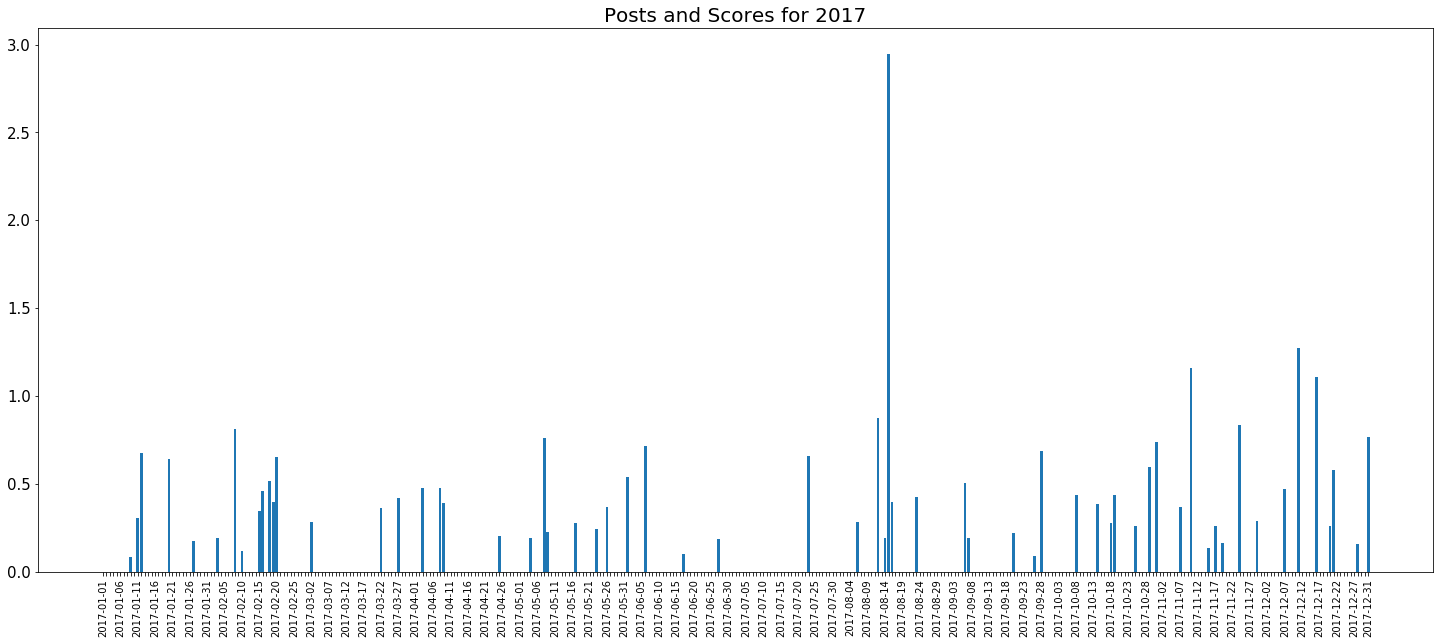

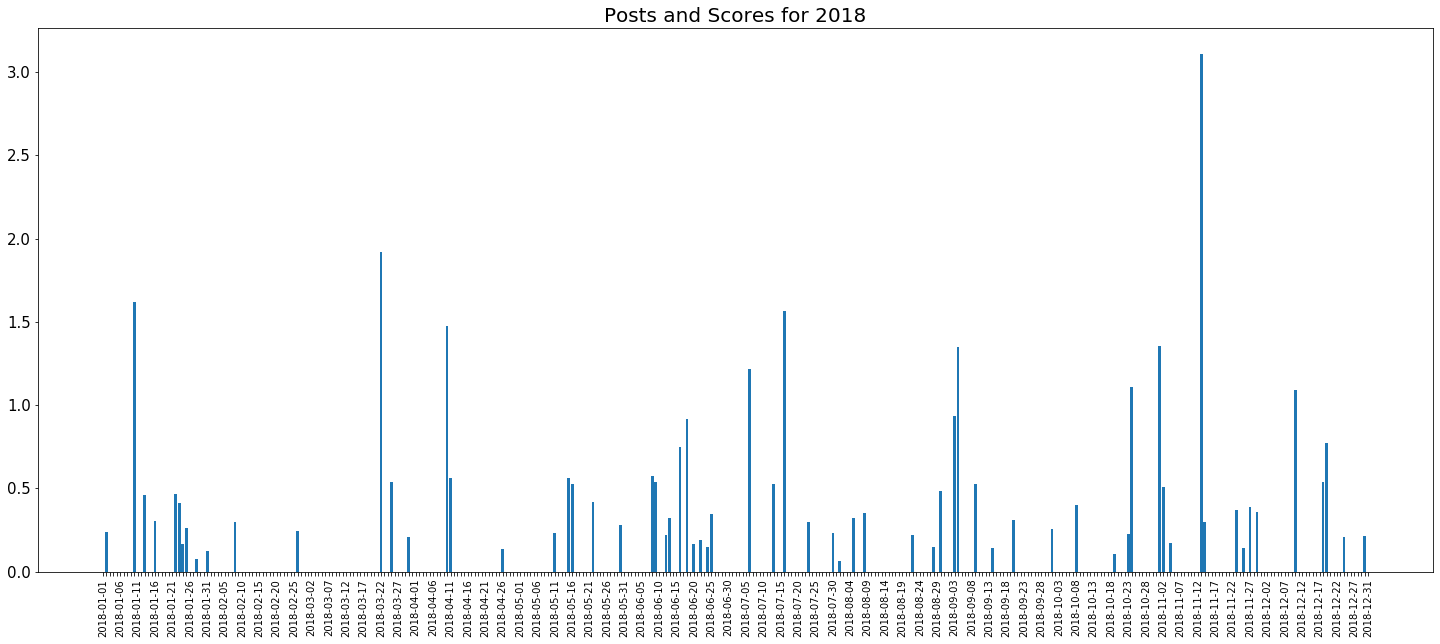

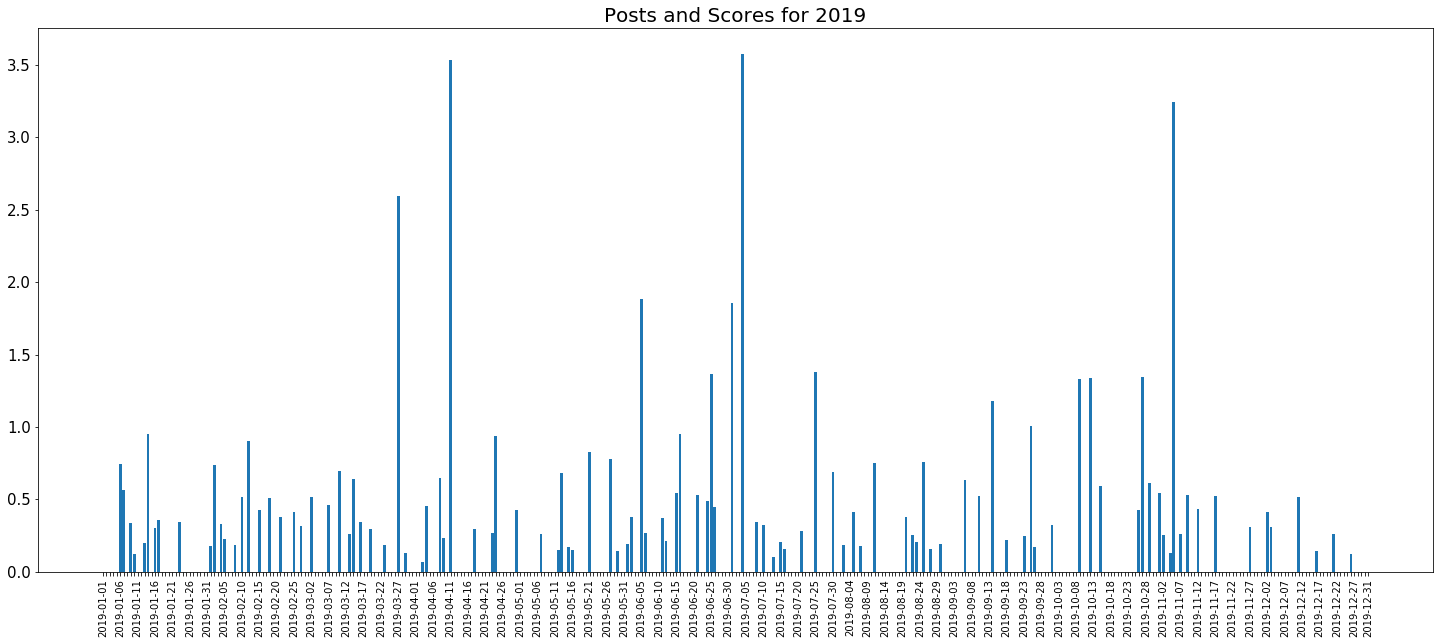

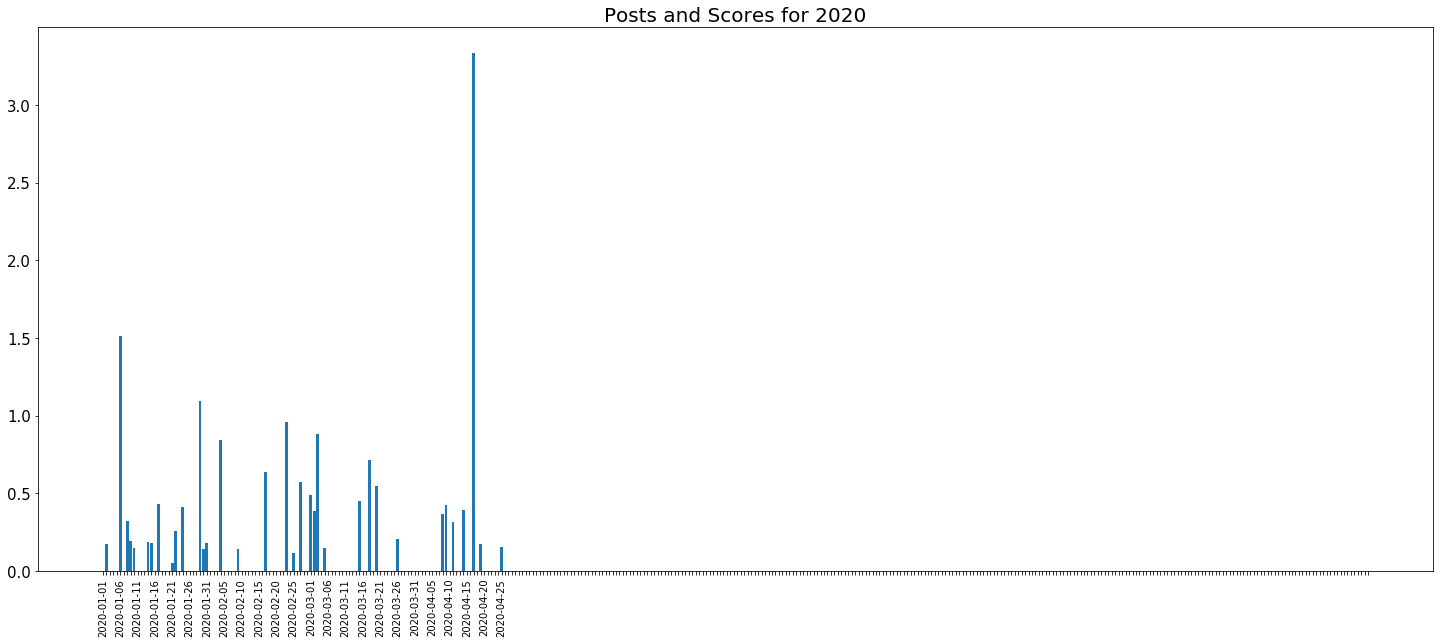

In [33]:
for i in range(int(start_year),int(end_year)+1):
    annual_chart(i)

In [34]:
#
# Preparing the presentation
#

In [35]:
if PwrptPrep == 1:
    try:
        prs = Presentation('Presentation - template.pptx')
    except:
        prs = Presentation('C:/Users/andre/OneDrive/Documents/Big Data Project/Jupyter Notebook Items/Presentation - template.pptx')

In [36]:
# change the title and date on the front page
# the slide shapes do not go nicely 0,1,2 they go 1,2,0
if PwrptPrep == 1:
    
    listShapes = [1,2,0]

    for i in range(3):
        slide = prs.slides[0]
        shape = slide.shapes[listShapes[i]]
        text_frame = shape.text_frame
        text_frame.paragraphs[0].runs[0].text = presentationTitle[i]

In [37]:
# add the Preamble and Summary slides
if PwrptPrep == 1:

    title_Preamble_Summary = ['Preamble', 'Summary']

    for i in range(2):
        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = title_Preamble_Summary[i]

        top = height = Inches(1.5)
        width = Inches(10.25)
        left = Inches(0.25)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame
        tf.word_wrap = True
        p = tf.add_paragraph()
        p.level = 1
        if i == 0:
            p.text = str(len(df)) +' English language posts were collected from glassdoor, each consisting of a the pros and cons of the company'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'the posts were collected from the first to the last post: ' + str(first_day_post) + ' to '+ str(last_day_post) 
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'the pros and cons were analysed for negative sentiment using VADAR Sentiment Analysis' 
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'VADER Sentiment Analysis. VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.' 
            p = tf.add_paragraph()
            p.level = 1            
            p.text = 'The results ploted in the following charts' 
            p = tf.add_paragraph()
            p.level = 1            
               
        if i == 1:
            p.text = 'to be added by user if required'
            p = tf.add_paragraph()
            p.level = 1       

In [38]:
# add the Chapter contents slide and Chapter 1 slide
if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[15]
    slide = prs.slides.add_slide(blank_slide_layout)

    shapes = slide.shapes

    shapes.title.text = 'Contents'

    rows = cols = 2
    left = Inches(0.25)
    top = Inches(1.5)
    width = Inches(1.5)
    height = Inches(1.5)

    table = shapes.add_table(rows, cols, left, top, width, height).table

    # set column widths
    table.columns[0].width = Inches(1.5)
    table.columns[1].width = Inches(2.0)

    tableText = ['01', 'Charts', '02', 'Appendix']
    TableFont = [60, 14, 60, 14]
    tableCell1 = [0,0,1,1]
    tableCell2 = [0,1,0,1]

    for i in range(4):
        table.cell(tableCell1[i], tableCell2[i]).text = tableText[i]
        cell = table.cell(tableCell1[i], tableCell2[i])
        para = cell.text_frame.paragraphs[0]
        para.font.bold = True
        para.font.size = Pt(TableFont[i])
        para.font.color.rgb = RGBColor(0, 55, 129) 
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE
        fill = cell.fill
        fill.background()

    slide = prs.slides.add_slide(prs.slide_layouts[9])
    placeholder = slide.placeholders[1]
    placeholder.text = '01'
    title = slide.shapes.title
    title.text = 'Charts'


In [39]:
# add a blank slide with title, text and saved graphic as per the list of items
if PwrptPrep == 1:
    
    for i in range(len(slideTitle)):

        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = slideTitle[i]

        top = width = height = Inches(1.5)
        left = Inches(0.25)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame

        p = tf.add_paragraph()
        p.text = slideText[i]
        p.font.bold = True
        p.font.size = Pt(14)

        left = Inches(0.25)
        top = Inches(2.5)
        height = Inches(4)
        width = Inches(9)
        pic = slide.shapes.add_picture(imagePath[i], left, top, width = width, height = height)

In [40]:
# add Appendix slide

if PwrptPrep == 1:
    
    slide = prs.slides.add_slide(prs.slide_layouts[9])
    placeholder = slide.placeholders[1]
    placeholder.text = '02'
    title = slide.shapes.title
    title.text = 'Appendix'

In [41]:
# add the 'First line of the latest upload slide'

if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[15]
    slide = prs.slides.add_slide(blank_slide_layout)

    shapes = slide.shapes

    shapes.title.text = 'First line uploaded glassdoor file'

    rows = 2
    cols = 6
    left = Inches(0.25)
    top = Inches(1.5)
    width = Inches(1.5)
    height = Inches(0.25)

    table = shapes.add_table(rows, cols, left, top, width, height).table

    # set column widths
    table.columns[0].width = Inches(0.5)
    table.columns[1].width = Inches(1.5)
    table.columns[2].width = Inches(1.0)
    table.columns[3].width = Inches(1.0)
    table.columns[4].width = Inches(2.5)
    table.columns[5].width = Inches(2.5)
    
    tableText = ['']
    
    # table headers
    for col in df.columns[0:cols-1]:
        tableText.append(col)
    
    # populate rest of list with dataframe cells
    for i in range((rows-1) * (cols-1)):
        if i%(cols-1) == 0:
            tableText.append(str(int(i/(cols-1))))          
        tableText.append(str(df.iat[int(i/(cols-1)), i%(cols-1)]))

    for i in range((rows) * cols):
        table.cell(int(i/(cols)), i%cols).text = tableText[i]
        cell = table.cell(int(i/(cols)), i%cols)
        para = cell.text_frame.paragraphs[0]
        if i%cols == 0 or int(i/cols) == 0:
            para.font.bold = True
        else:
            para.font.bold = False
        para.font.size = Pt(10)
        para.font.color.rgb = RGBColor(0, 0, 0) 
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE
        fill = cell.fill
        fill.background()
    

In [42]:
# add the methodology slide
# and the 'Code used to gather page', rotate the text
# and upload the Python, github and Pandas pages

if PwrptPrep == 1:
    
    # list of appendix text files to take from my PC to be put into slides
    appendixTitleList = ['Code used to gather the glassdoor data',
                         'Appendix: Python Programming Language','Appendix: Github','Appendix: Pandas']
    appendixFileList = ['Presentation - code glassdoor.txt',
                        'Presentation - Python Slide.txt','Presentation - Github Slide.txt','Presentation - Pandas Slide.txt']
    appendixFileList_alt = []
    for element in appendixFileList:
        appendixFileList_alt.append('C:/Users/andre/OneDrive/Documents/Big Data Project/Jupyter Notebook Items/' + element)
    
    for i in range(len(appendixTitleList)):
        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)
        title = slide.shapes.title
        title.text = appendixTitleList[i]
        try:
            lines = [line.rstrip('\n') for line in open(appendixFileList[i])]
        except:
            lines = [line.rstrip('\n') for line in open(appendixFileList_alt[i])]
        
        if (appendixTitleList[i] == 'Code used to gather the glassdoor data'): # rotate the text code -90
            top = height = Inches(1.25)
            width = Inches(10.25)
            left = Inches(-4.25)
            txBox = slide.shapes.add_textbox(left, top, width, height)
            txBox.rotation = -90            
        else: # other slides are normal
            top = height = Inches(1.25)
            width = Inches(10.25)
            left = Inches(0.25)
            txBox = slide.shapes.add_textbox(left, top, width, height)
            txBox.rotation = 0
            
        tf = txBox.text_frame
        tf.word_wrap = True
        
        for ii in range(len(lines)):
            p = tf.add_paragraph()
            p.level = 1
        
            if (appendixTitleList[i] == 'Code used to gather the glassdoor data'): # reduce the font size
                p.font.size = Pt(8)
                p.level = 0  
            else:
                txBox.rotation = 0
                p.font.size = Pt(12)            
            
            if 'https' in lines[ii]:
                r = p.add_run()
                r.text = lines[ii].split('https')[0]
                r1 = p.add_run()
                r1.text = 'https' + lines[ii].split('https')[1]        
                hlink = r1.hyperlink
                hlink.address = r1.text
            else:
                p.text = lines[ii]


In [43]:
# add closing slide

if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[40]
    slide = prs.slides.add_slide(blank_slide_layout)

In [44]:
# save completed presentation to file using name diven in the slide name cell
if PwrptPrep == 1:

    prs.save(saveFileName)

In [45]:
#
# all the slide types
# only to be run for reference
#

In [46]:
# prs = Presentation('Persentation - template.pptx')

In [47]:
# for i in range(43):

#     blank_slide_layout = prs.slide_layouts[i]
#     slide = prs.slides.add_slide(blank_slide_layout)

In [48]:
# prs.save('presentationPrep - all the slides.pptx')